# Data Modelarion
## Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import scipy as sp 
import re
from unidecode import unidecode

import matplotlib.pyplot as plt
import seaborn as sns

# one hot encoding con feature-engine
#from feature_engine.encoding import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# GroupKFold en un pipeline con StandardScaler y SVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate, GroupKFold, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

## Import Data

In [2]:
X_train= pd.read_csv('../datasets/processed/X_train.csv', sep=',', encoding='utf-8')
X_test= pd.read_csv('../datasets/processed/X_test.csv', sep=',', encoding='utf-8')
y_test= pd.read_csv('../datasets/processed/y_test.csv', sep=',', encoding='utf-8')
y_train= pd.read_csv('../datasets/processed/y_train.csv', sep=',', encoding='utf-8')

In [3]:
# Verificar las formas de los conjuntos resultantes
print("Shapes of training sets:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nShapes of testing sets:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Shapes of training sets:
X_train: (454, 35)
y_train: (454, 1)

Shapes of testing sets:
X_test: (114, 35)
y_test: (114, 1)


### Modeling of Target

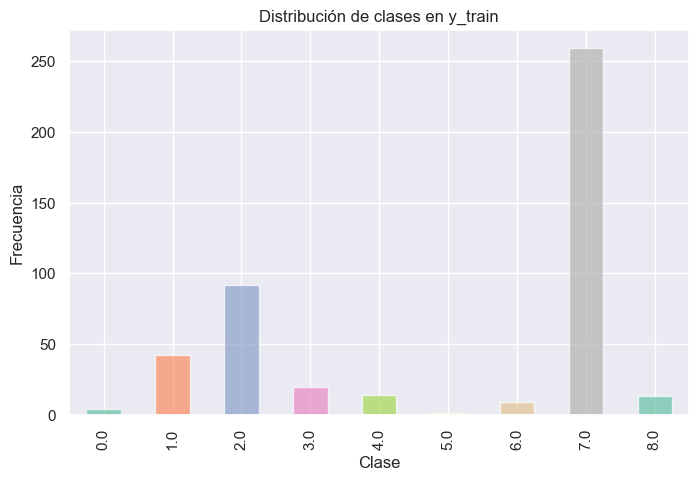

In [4]:
# Establecer el estilo y la paleta de colores
sns.set(style="darkgrid")
palette = "Set2"

# Crear un gráfico de barras para la columna 'biopsia'
plt.figure(figsize=(8, 5))
y_train['biopsia'].value_counts().sort_index().plot(kind='bar', color=sns.color_palette(palette), alpha=0.7)
plt.title('Distribución de clases en y_train')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

In [5]:
# Verificar el balance de clases en los conjuntos de entrenamiento y prueba
print("Distribución de clases en X_train:")
if len(X_train) > 0:
    print(pd.Series(X_train.values.flatten()).value_counts())
else:
    print("El conjunto de entrenamiento está vacío.")

print("\nDistribución de clases en y_train:")
if len(y_train) > 0:
    print(pd.Series(y_train.values.flatten()).value_counts())
else:
    print("El conjunto de prueba está vacío.")


Distribución de clases en X_train:
 0.000000    9983
 1.000000    3617
-0.071750     452
-0.172889     435
-0.254351     338
             ... 
-0.363555       1
 1.072357       1
 0.662096       1
 1.963391       1
-0.425094       1
Name: count, Length: 208, dtype: int64

Distribución de clases en y_train:
7.0    259
2.0     92
1.0     42
3.0     20
4.0     14
8.0     13
6.0      9
0.0      4
5.0      1
Name: count, dtype: int64


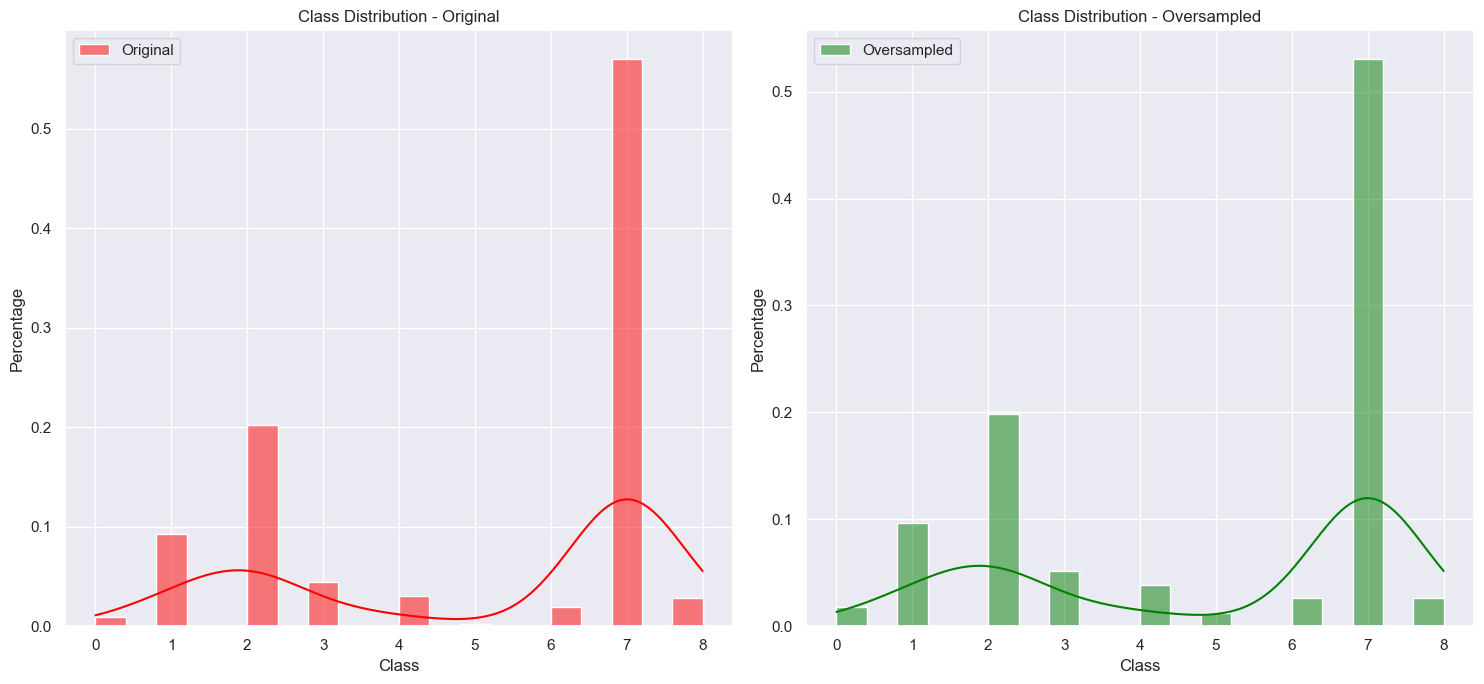

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline
# Configuración de semilla
SEED = 301
np.random.seed(SEED)
# Asumiendo que ya has cargado X_train, y_train, X_test, y_test
# y que has definido SEED

# Especificar la proporción deseada para cada clase
sampling_strategy = {
    0.0: 9,
    1.0: 47,
    2.0: 97,
    3.0: 25,
    4.0: 19,
    5.0: 6,
    6.0: 13,
    7.0: 259,
    8.0: 13  # Ajusta esta proporción para que sea mayor o igual al número original (13)
}

# Crear un objeto RandomOverSampler con la proporción especificada
oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=SEED)

# Aplicar oversampling a los conjuntos de entrenamiento
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Crear DataFrames con las etiquetas de clase
df_original = pd.DataFrame({'Class': y_train.squeeze(), 'Count': 1, 'Type': 'Original'})

# Convertir el array 2D a Serie de Pandas
y_train_resampled_series = pd.Series(y_train_resampled.values.flatten(), name='Class')

df_oversampled = pd.DataFrame({'Class': y_train_resampled_series, 'Count': 1, 'Type': 'Oversampled'})


# Combinar DataFrames para generar el gráfico
data = pd.concat([df_original, df_oversampled], ignore_index=True)


# Gráfico izquierdo - Original
# Establecer el estilo y la paleta de colores
sns.set(style="darkgrid")
palette = "Set2"
# Crear gráficos uno al lado del otro
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Gráfico izquierdo - Original
sns.histplot(data=df_original, x='Class', kde=True, color='red', label='Original', ax=axs[0], stat="probability", bins=20)
axs[0].set_title('Class Distribution - Original')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Percentage')
axs[0].legend()

# Gráfico derecho - Oversampled
sns.histplot(data=df_oversampled, x='Class', kde=True, color='green', label='Oversampled', ax=axs[1], stat="probability", bins=20)
axs[1].set_title('Class Distribution - Oversampled')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Percentage')
axs[1].legend()

# Ajustar diseño
plt.tight_layout()
plt.show()

### Modeling Predictor Variables

Shapes of training sets:
X_train: (454, 35)
y_train: (454, 1)

Shapes of testing sets:
X_test: (114, 35)
y_test: (114, 1)
X_train_resampled: (488, 35)
y_train_resampled: (488, 1)
Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 14, 'min_samples_split': 2}


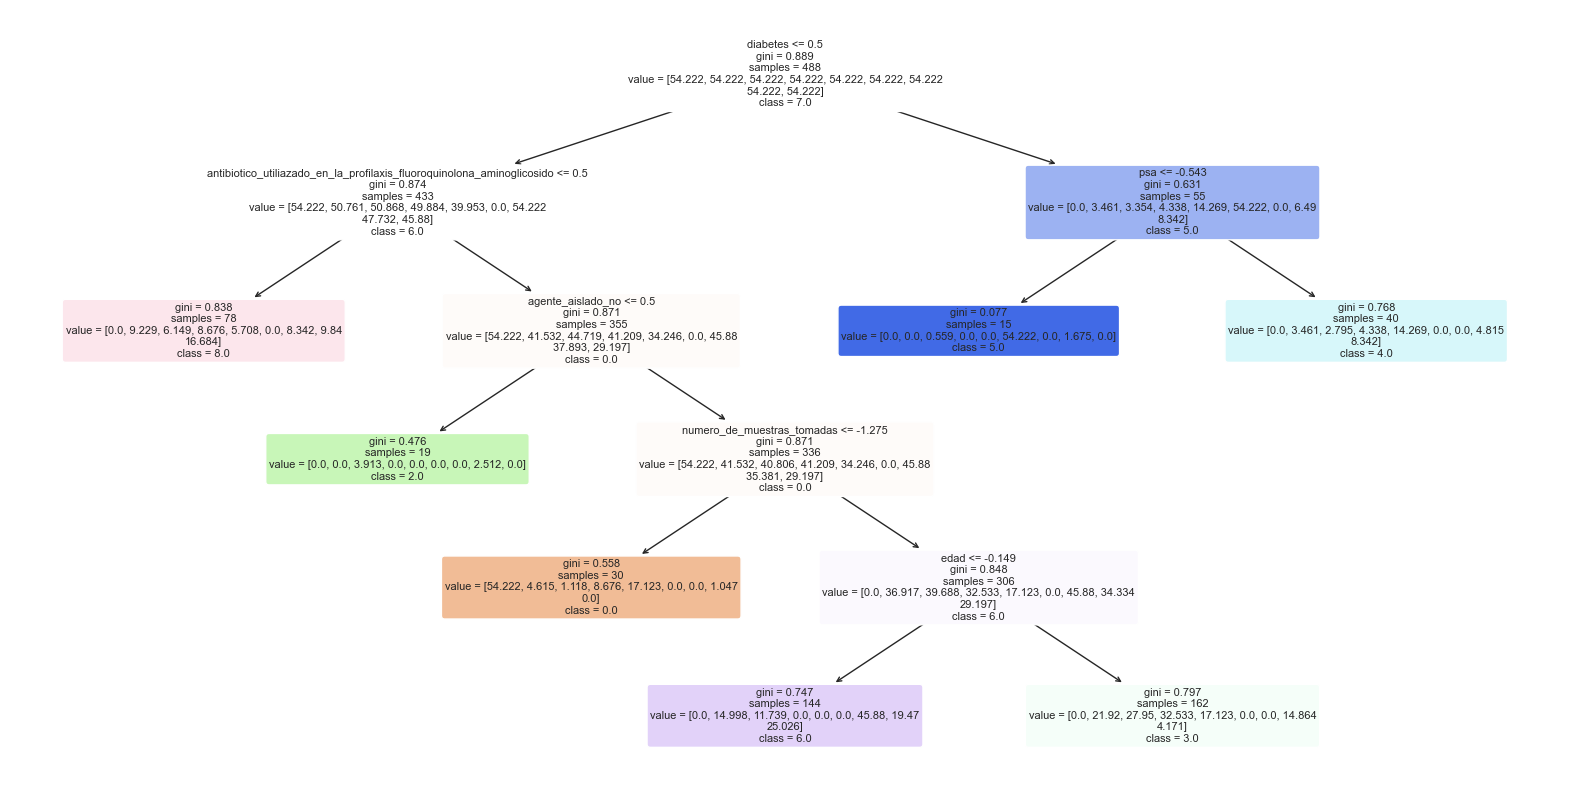

In [7]:
# Verificar las formas de los conjuntos resultantes
print("Shapes of training sets:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nShapes of testing sets:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)
print("X_train_resampled:", X_train_resampled.shape)
print("y_train_resampled:", y_train_resampled.shape)

X_train =X_train_resampled
y_train = y_train_resampled
# Configuración de semilla
SEED = 301
np.random.seed(SEED)

def train_and_cross_validate_decision_tree(X_train, y_train, max_depth, min_samples_leaf=None):
    cv = StratifiedKFold(n_splits=10)
    if min_samples_leaf:
        modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=SEED)
    else:
        modelo = DecisionTreeClassifier(max_depth=max_depth, random_state=SEED)

    results = cross_validate(modelo, X_train, y_train, cv=cv, return_train_score=True, scoring='accuracy')
    
    for fold in range(10):
        train_score = results[f'train_score'][fold] * 100
        test_score = results[f'test_score'][fold] * 100
        print(f'Fold {fold + 1}: Árbol max_depth = {max_depth}, min_samples_leaf = {min_samples_leaf}, training = {train_score:.2f}, testing = {test_score:.2f}')
    
    avg_train_score = results['train_score'].mean() * 100
    avg_test_score = results['test_score'].mean() * 100
    print(f'Average: Árbol max_depth = {max_depth}, min_samples_leaf = {min_samples_leaf}, average training = {avg_train_score:.2f}, average testing = {avg_test_score:.2f}')
    
    return max_depth, min_samples_leaf, avg_train_score, avg_test_score

# Función para realizar búsqueda de hiperparámetros
# Función para realizar búsqueda de hiperparámetros
def hyperparameter_search(X_train, y_train, espacio_de_parametros):
    buscar = GridSearchCV(DecisionTreeClassifier(random_state=SEED),
                          espacio_de_parametros,
                          cv=KFold(n_splits=5, shuffle=True))

    buscar.fit(X_train, y_train)
    resultados = pd.DataFrame(buscar.cv_results_)
    return resultados, buscar.best_params_


# Función para visualizar el árbol de decisión
# Función para visualizar el árbol de decisión
def visualize_tree(model, features, class_names=None):
    plt.figure(figsize=(20, 10))
    plot_tree(model, filled=True, rounded=True, class_names=class_names, feature_names=features)
    plt.savefig('../datasets/images/tree.png')

espacio_de_parametros = {
    'max_depth': [8, 10, 12, 15],
    'min_samples_leaf': [10, 12, 14, 16], #16, 32, 64, 128, 256
    'min_samples_split': [2, 5, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7],
    'criterion': ['gini', 'entropy']
}


# Realizar búsqueda de hiperparámetros
resultados_hyperparametros, mejores_hiperparametros = hyperparameter_search(X_train, y_train, espacio_de_parametros)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", mejores_hiperparametros)

# Entrenar el modelo con los mejores hiperparámetros
mejor_modelo = DecisionTreeClassifier(**mejores_hiperparametros, class_weight='balanced',random_state=SEED)
mejor_modelo.fit(X_train, y_train)

# Visualizar el árbol de decisión con los mejores hiperparámetros
visualize_tree(mejor_modelo, X_train.columns, class_names=[str(i) for i in mejor_modelo.classes_])


In [8]:
# Después de ejecutar la búsqueda de hiperparámetros
# Función para realizar búsqueda de hiperparámetros


# Realizar búsqueda de hiperparámetros
resultados_hyperparametros, mejores_hiperparametros = hyperparameter_search(X_train, y_train, espacio_de_parametros)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", mejores_hiperparametros)

# Mostrar resultados filtrados
resultados_filtrados = resultados_hyperparametros[['param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score']]
# Mostrar resultados filtrados ordenados por mean_test_score de mayor a menor
resultados_filtrados_ordenados = resultados_filtrados.sort_values(by='mean_test_score', ascending=False)
print("Resultados filtrados ordenados por mean_test_score de mayor a menor:")
print(resultados_filtrados_ordenados.head(15))

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 12, 'max_features': 0.5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Resultados filtrados ordenados por mean_test_score de mayor a menor:
    param_max_depth param_min_samples_leaf  mean_test_score  std_test_score
528              12                     10         0.555291        0.024377
529              12                     10         0.555291        0.024377
530              12                     10         0.555291        0.024377
531              12                     10         0.555291        0.024377
611              15                     10         0.551210        0.021115
608              15                     10         0.551210        0.021115
610              15                     10         0.551210        0.021115
609              15                     10         0.551210        0.021115
237              12                     16         0.549253        0.034493
318              15                

In [9]:
y_train

,biopsia
0,8.0
1,7.0
2,2.0
3,2.0
4,2.0
...,...
483,5.0
484,6.0
485,6.0
486,6.0


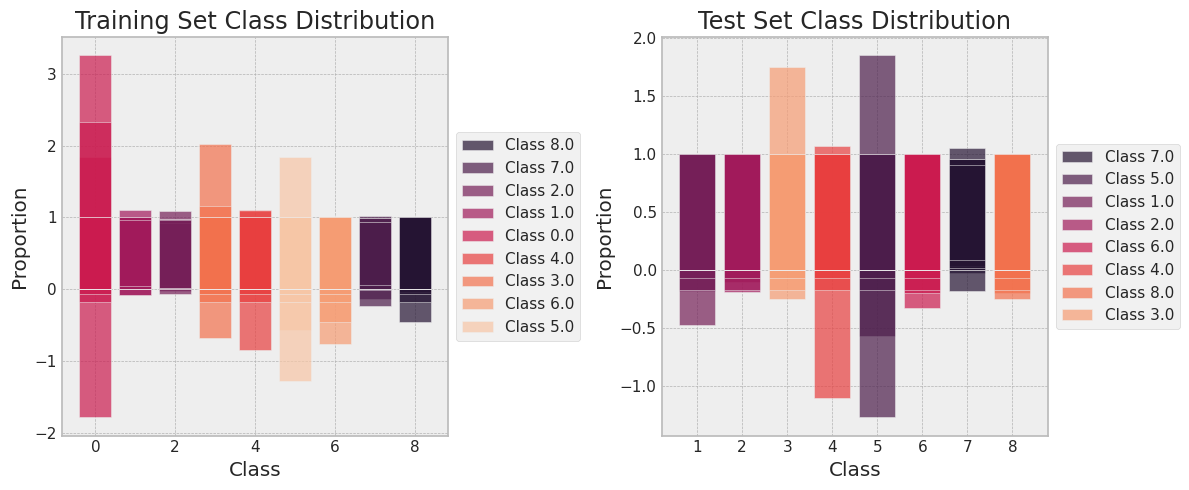

In [10]:
# Convertir las etiquetas de clase a listas
train_class_labels = list(y_train.iloc[:, 0].unique())
test_class_labels = list(y_test.iloc[:, 0].unique())

# Definir una paleta de colores para las clases
palette = sns.color_palette("rocket", len(train_class_labels))

# Configurar el estilo de fondo oscuro
plt.style.use('bmh')

# Crear una figura y ejes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Graficar la distribución de clases en conjunto de entrenamiento
for class_label, color in zip(train_class_labels, palette):
    class_data = X_train[y_train.iloc[:, 0] == class_label]
    axes[0].bar(class_label, class_data.mean(), color=color, alpha=0.7, label=f'Class {class_label}')

axes[0].set_title('Training Set Class Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Proportion')
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Graficar la distribución de clases en conjunto de prueba
for class_label, color in zip(test_class_labels, palette):
    class_data = X_test[y_test.iloc[:, 0] == class_label]
    axes[1].bar(class_label, class_data.mean(), color=color, alpha=0.7, label=f'Class {class_label}')

axes[1].set_title('Test Set Class Distribution')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Proportion')
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Restaurar el estilo por defecto al final
plt.style.use('default')

plt.tight_layout()
plt.show()

In [11]:
# Imprimir todas las columnas disponibles
print("Columnas disponibles en resultados_hyperparametros:")
print(resultados_hyperparametros.columns)

# Imprimir los resultados sin filtrar columnas específicas
print("Resultados de búsqueda de hiperparámetros:")
print(resultados_hyperparametros.sort_values(by='mean_test_score', ascending=False))


Columnas disponibles en resultados_hyperparametros:
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_max_features',
       'param_min_samples_leaf', 'param_min_samples_split', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')
Resultados de búsqueda de hiperparámetros:
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
528       0.005097      0.000638         0.004198        0.001167   
529       0.005285      0.000728         0.003995        0.000004   
530       0.005282      0.000781         0.004217        0.000392   
531       0.005476      0.000970         0.004598        0.001020   
611       0.005058      0.000050         0.003417        0.000475   
..             ...           ...              ...             ...   
142

### Clasificación de datos

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Predecir etiquetas en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)

# Imprimir el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        12
         2.0       0.00      0.00      0.00        24
         3.0       0.06      1.00      0.11         2
         4.0       0.17      0.33      0.22         6
         5.0       0.00      0.00      0.00         1
         6.0       0.09      0.60      0.15         5
         7.0       0.00      0.00      0.00        63
         8.0       0.00      0.00      0.00         1

    accuracy                           0.06       114
   macro avg       0.03      0.21      0.05       114
weighted avg       0.01      0.06      0.02       114



c:\Users\ozi\ti\evstack\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ozi\ti\evstack\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ozi\ti\evstack\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ozi\ti\evstack\lib\site-packages\sklearn\m

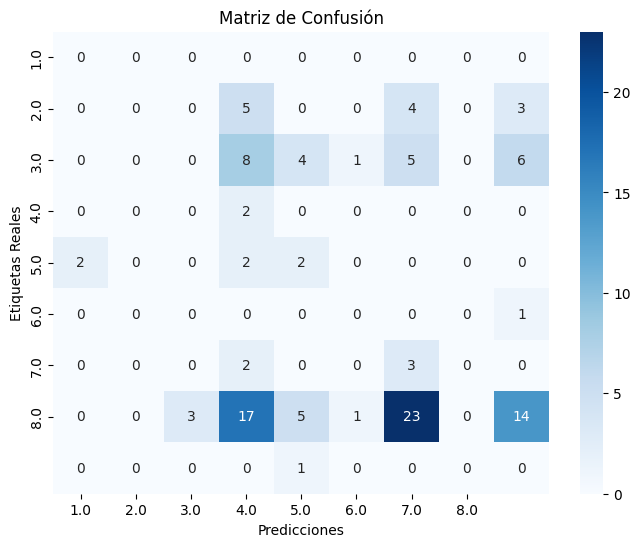

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
# conf_matrix = confusion_matrix(y_test_unidimensional, y_pred_prueba_unidimensional)
conf_matrix = confusion_matrix(y_test, y_pred)
# Crear un mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión')
plt.show()

### Rendimiento en el Conjunto de Entrenamiento

In [14]:
from sklearn.model_selection import cross_val_score
from scipy.stats import sem, t
from numpy import mean

# Utilizar validación cruzada estratificada
cv = StratifiedKFold(n_splits=10)

# Realizar validación cruzada para obtener las métricas de rendimiento
cv_scores = cross_val_score(mejor_modelo, X_train, y_train, cv=cv)

# Calcular la precisión media
mean_accuracy = mean(cv_scores) * 100
print(f"Accuracy media {mean_accuracy:.2f}")

# Calcular el intervalo de confianza
confidence = 0.95
n = len(cv_scores)
m = mean(cv_scores)
std_err = sem(cv_scores)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

# Calcular el intervalo de confianza y mostrarlo
intervalo_confianza = (m - h, m + h)
print(f"Intervalo {confidence * 100:.2f}% {intervalo_confianza}")

# Imprimir el modelo entrenado
print(mejor_modelo)



c:\Users\ozi\ti\evstack\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


Accuracy media 9.63
Intervalo 95.00% (0.0601878958731244, 0.13241414494320214)
DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                       max_features='sqrt', min_samples_leaf=14,
                       random_state=301)


### Rendimiento en el conjunto de pruebas

In [15]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada en el conjunto de pruebas
cv_scores = cross_val_score(mejor_modelo, X_test, y_test, cv=5, scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Resultados de Validación Cruzada en el Conjunto de Pruebas:")
print(cv_scores)
print(f"Promedio de Precisión: {cv_scores.mean():.2f}")


Resultados de Validación Cruzada en el Conjunto de Pruebas:
[0.04347826 0.         0.04347826 0.04347826 0.04545455]
Promedio de Precisión: 0.04


c:\Users\ozi\ti\evstack\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [16]:
from sklearn.metrics import classification_report

# Entrenar el modelo con los mejores hiperparámetros
mejor_modelo = DecisionTreeClassifier(**mejores_hiperparametros, random_state=SEED)
mejor_modelo.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)

# Imprimir informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))


Informe de clasificación:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        12
         2.0       0.29      0.17      0.21        24
         3.0       1.00      0.50      0.67         2
         4.0       0.00      0.00      0.00         6
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         5
         7.0       0.59      0.86      0.70        63
         8.0       0.00      0.00      0.00         1

    accuracy                           0.52       114
   macro avg       0.21      0.17      0.18       114
weighted avg       0.41      0.52      0.44       114



c:\Users\ozi\ti\evstack\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ozi\ti\evstack\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ozi\ti\evstack\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ozi\ti\evstack\lib\site-packages\sklearn\m

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predecir en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprimir las métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.52
Precision: 0.41
Recall: 0.52
F1 Score: 0.44


c:\Users\ozi\ti\evstack\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ozi\ti\evstack\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
import joblib

# Guardar el modelo en la carpeta "models"
joblib.dump(mejor_modelo, '../datasets/models/mejor_modelo_decision_tree.joblib')

# Guardar los mejores hiperparámetros en la carpeta "hyperparameters"
joblib.dump(mejores_hiperparametros, '../datasets/models/mejores_hiperparametros_decision_tree.joblib')


['../datasets/models/mejores_hiperparametros_decision_tree.joblib']


#### Análisis del Modelo:<br>

**Matriz de Confusión y Reporte de Clasificación:**<br>

La matriz de confusión muestra el rendimiento del modelo en términos de predicciones correctas e incorrectas para cada clase.
El reporte de clasificación proporciona métricas más detalladas como precisión, recall y F1-score por clase.
Observaciones:

El modelo muestra una baja precisión (0.41) en varias clases, indicando que las predicciones positivas son no son confiables.
La clases 0.0,1.0,4.0,5.0,6.0,8.0 tiene una baja precisión y recall, lo que sugiere que el modelo tiene dificultades para predecir estas clases. La muestra para esta clase es baja (1), lo que puede afectar las métricas.
El modelo tiene un bajo rendimiento global, con una precisión promedio ponderada de 0.41 y un recall promedio ponderado de 0.52.<br>

**Validación Cruzada en Conjunto de Entrenamiento:**<br>

La precisión media de la validación cruzada en el conjunto de entrenamiento es del 9.36%, con un intervalo de confianza del 95% entre 6.02% y 13.24%.
Este bajo rendimiento en la validación cruzada indica que el modelo generaliza de forma erronea los datos no vistos durante el entrenamiento.<br>

**Validación Cruzada en Conjunto de Pruebas:**<br>

La validación cruzada en el conjunto de pruebas muestra una precisión promedio baja del 4%. Esto puede ser debido a la baja cantidad de muestras en algunas clases, lo que afecta la capacidad del modelo para generalizar.
Informe de Clasificación en Conjunto de Pruebas:

El modelo tiene una precisión del 4% en el conjunto de pruebas, indicando un buen rendimiento en datos no vistos.
Las métricas detalladas muestran un buen equilibrio entre precisión, recall y F1-score para la mayoría de las clases.
Conclusión:

El modelo parece tener un rendimiento malo en general, en equilibrio entre precisión y recall en la mayoría de las clases.
La baja precisión en la clases (..) podría deberse a la falta de datos de entrenamiento para esa clase específica.
La validación cruzada en el conjunto de pruebas podría no reflejar completamente la capacidad del modelo debido a desafíos en la distribución de clases.
Se recomienda recopilar más datos para clases con bajas muestras y considerar técnicas de procesamiento de datos para abordar desequilibrios.